---
# Description

An exploratory data analysis of PCSO draw results

---


# Objective

This project only deals with **exploratory analysis**, where the main objective is understanding how the data is distributed and generate an insight for future reference. This particular analysis focuses on the Ultra Lotto 6/58.

<i>Disclaimer : Remember that lotteries are designed to be random, so while EDA can reveal patterns in historical data, it does not guarantee future success in predicting winning combinations. These analyses are mostly for curiosity and entertainment, and they should not be used as a basis for gambling.

Always gamble responsibly, and consider the odds and risks associated with playing the lottery.</i>

---

# Outline

*A.Data Preprocessing*

*B.Descriptive Analysis*
1. [Frequency Distribution](#freq)
2. [Central Tendency](#cten)

*C.Exploratory Analysis*
1. [Heatmap](#hmap)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pcso = pd.read_csv("~/Documents/data/pcso_data.csv",index_col=0)

In [2]:
pcso.head()

,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT (PHP),WINNERS
0,Superlotto 6/49,37-20-41-05-46-35,10/5/2023,"109,025,555.20",0
1,Lotto 6/42,25-24-26-35-21-42,10/5/2023,"21,249,596.40",0
2,6D Lotto,5-1-6-7-0-0,10/5/2023,"872,333.00",0
3,3D Lotto 2PM,4-8-2,10/5/2023,"4,500.00",203
4,3D Lotto 5PM,6-7-3,10/5/2023,"4,500.00",199


In [3]:
pcso.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33024 entries, 0 to 33023
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LOTTO GAME     33024 non-null  object
 1   COMBINATIONS   33024 non-null  object
 2   DRAW DATE      33024 non-null  object
 3   JACKPOT (PHP)  33024 non-null  object
 4   WINNERS        33024 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [4]:
nullVals = pcso.isnull().sum().sum()
print(nullVals)

0


>Therefore there are no null values

In [5]:
pcso.columns

Index(['LOTTO GAME', 'COMBINATIONS', 'DRAW DATE', 'JACKPOT (PHP)', 'WINNERS'], dtype='object')

In [6]:
uniqueVals = pcso["LOTTO GAME"].unique()
print(uniqueVals)

['Superlotto 6/49' 'Lotto 6/42' '6D Lotto' '3D Lotto 2PM' '3D Lotto 5PM'
 '3D Lotto 9PM' '2D Lotto 2PM' '2D Lotto 5PM' '2D Lotto 9PM'
 'Grand Lotto 6/55' 'Megalotto 6/45' '4D Lotto' 'Ultra Lotto 6/58'
 'Suertres Lotto 11:30AM' 'Suertres Lotto 12:30PM' 'Suertres Lotto 2PM'
 'EZ2 Lotto 2PM' 'EZ2 Lotto 11:30AM' 'EZ2 Lotto 12:30PM']


In [7]:
dfULotto = pcso[(pcso["LOTTO GAME"] == "Ultra Lotto 6/58")]
dfULotto.loc[:,"JACKPOT (PHP)"] = dfULotto["JACKPOT (PHP)"].str.replace(",","").astype(float)
dfSortedULotto = dfULotto.sort_values(by="JACKPOT (PHP)", ascending=False)
dfSortedULotto

,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT (PHP),WINNERS
14751,Ultra Lotto 6/58,40-50-37-25-01-45,10/14/2018,1180622508.0,2
14769,Ultra Lotto 6/58,28-14-54-50-17-27,10/12/2018,1112647388.0,0
14797,Ultra Lotto 6/58,12-16-46-03-38-36,10/9/2018,1026264340.0,0
14814,Ultra Lotto 6/58,45-21-02-30-07-10,10/7/2018,954503164.0,0
14832,Ultra Lotto 6/58,01-30-27-36-49-12,10/5/2018,903290152.0,0
...,...,...,...,...,...
11451,Ultra Lotto 6/58,45-43-02-47-13-58,10/20/2019,49500000.0,0
11468,Ultra Lotto 6/58,55-37-11-21-18-45,10/18/2019,49500000.0,0
11495,Ultra Lotto 6/58,13-23-09-58-38-14,10/15/2019,49500000.0,0
11514,Ultra Lotto 6/58,13-31-17-22-35-36,10/13/2019,49500000.0,0


---
## Frequency Distribution
<a id='freq'></a>

---

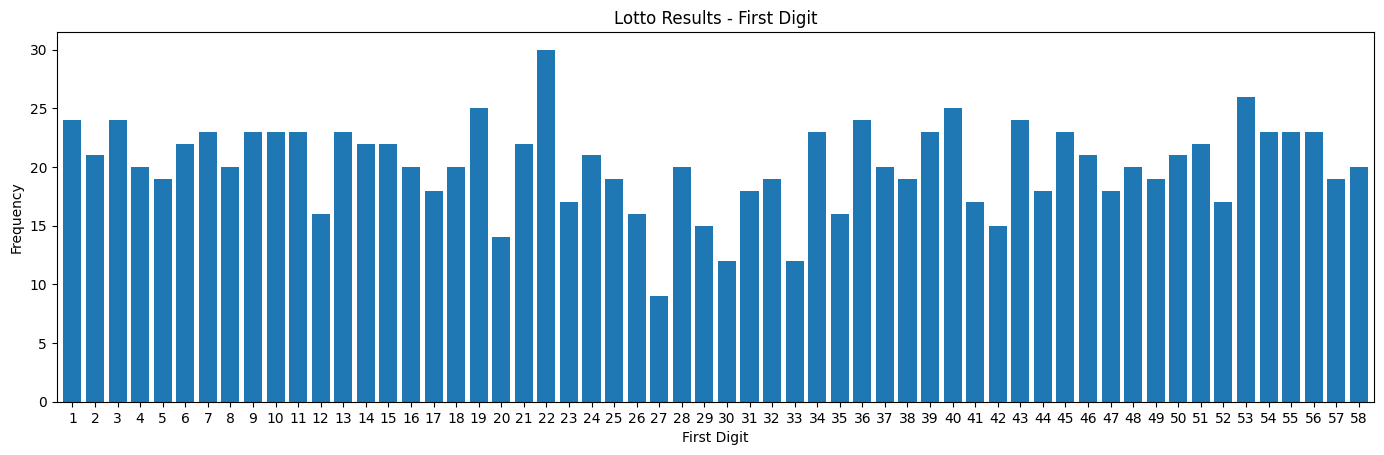

In [8]:
combArray = dfSortedULotto["COMBINATIONS"].to_numpy()
digitTarget = []
xValues = range(1,59)
yValues = {key:0 for key in range(1,59)}

def getDigit(digit):
    for x in combArray:
        lottoDigit = int(x.split("-")[digit-1])
        if str(lottoDigit).startswith("0"):
            lottoDigit = str(lottoDigit)[:-1]
            digitTarget.append(lottoDigit)
        else:
            digitTarget.append(lottoDigit)

def getyValues():
    for y in digitTarget:
        if y in yValues:
            yValues[y]+= 1

def clearyValues():
    for z in yValues:
        yValues[z] = 0

def pltFigure(title,xlabel):
    plt.figure().set_figwidth(17)
    plt.margins(x=0.005,tight=True)
    plt.bar(xValues,yValues.values())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.xticks(range(1,59))
    plt.show()

getDigit(1)
getyValues()
pltFigure("Lotto Results - First Digit","First Digit")

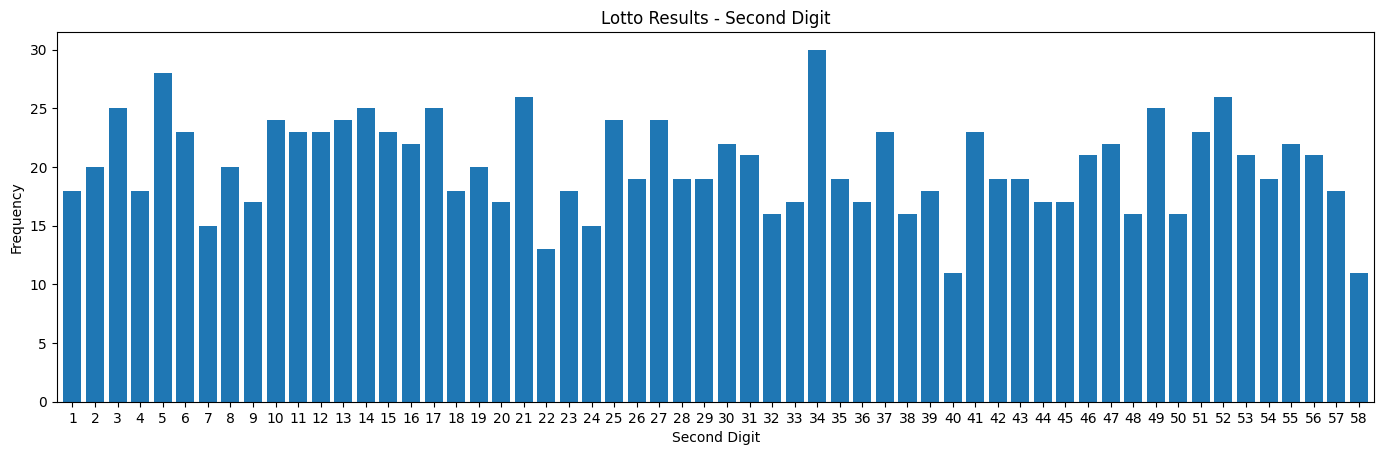

In [9]:
digitTarget = []
clearyValues()
getDigit(2)
getyValues()
pltFigure("Lotto Results - Second Digit","Second Digit")

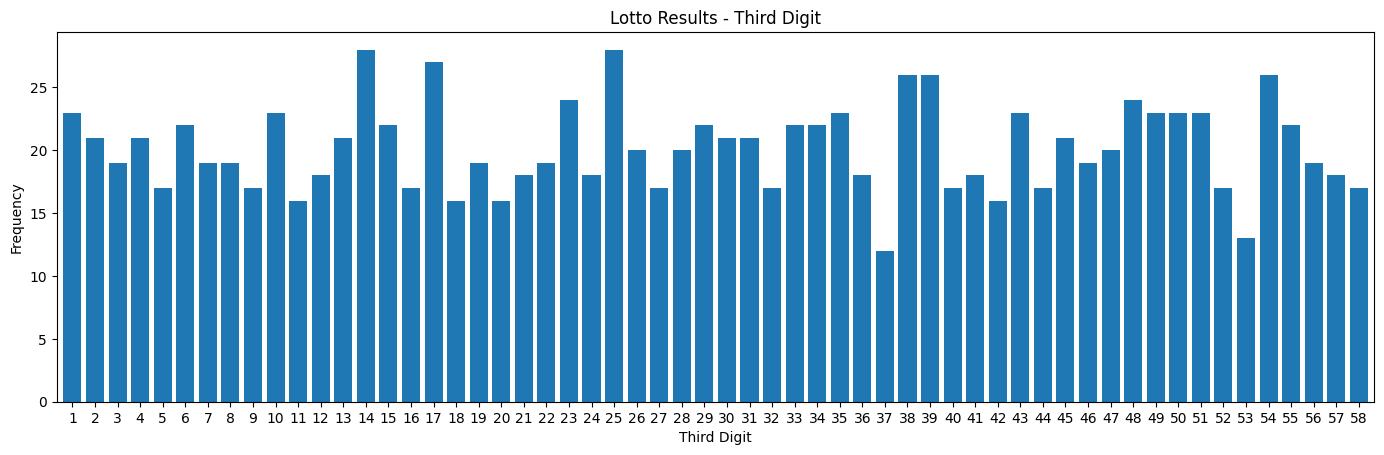

In [10]:
digitTarget = []
clearyValues()
getDigit(3)
getyValues()
pltFigure("Lotto Results - Third Digit","Third Digit")

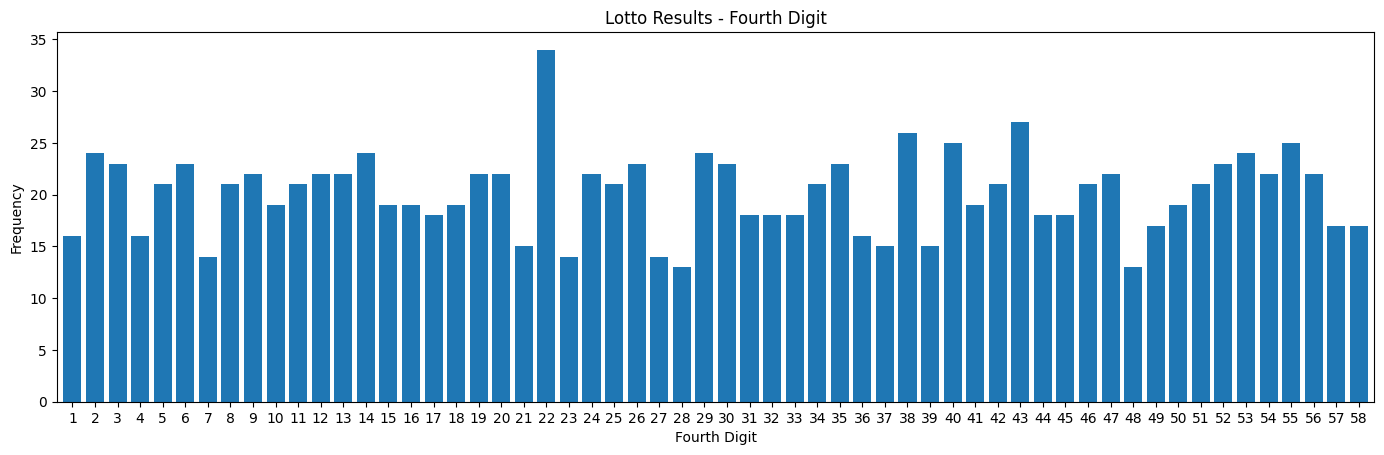

In [11]:
digitTarget = []
clearyValues()
getDigit(4)
getyValues()
pltFigure("Lotto Results - Fourth Digit","Fourth Digit")

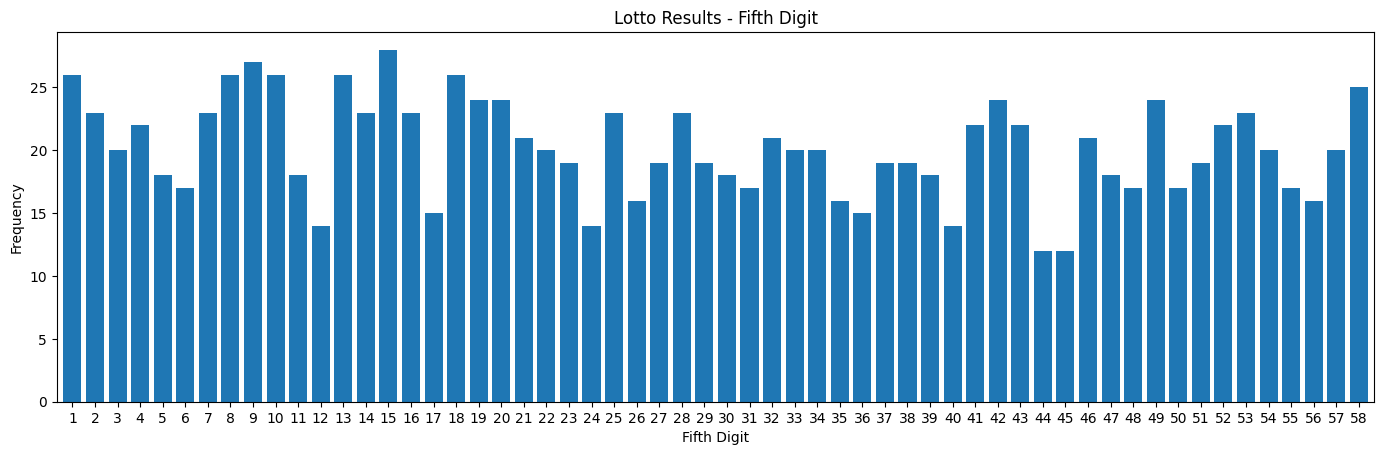

In [12]:
digitTarget = []
clearyValues()
getDigit(5)
getyValues()
pltFigure("Lotto Results - Fifth Digit","Fifth Digit")

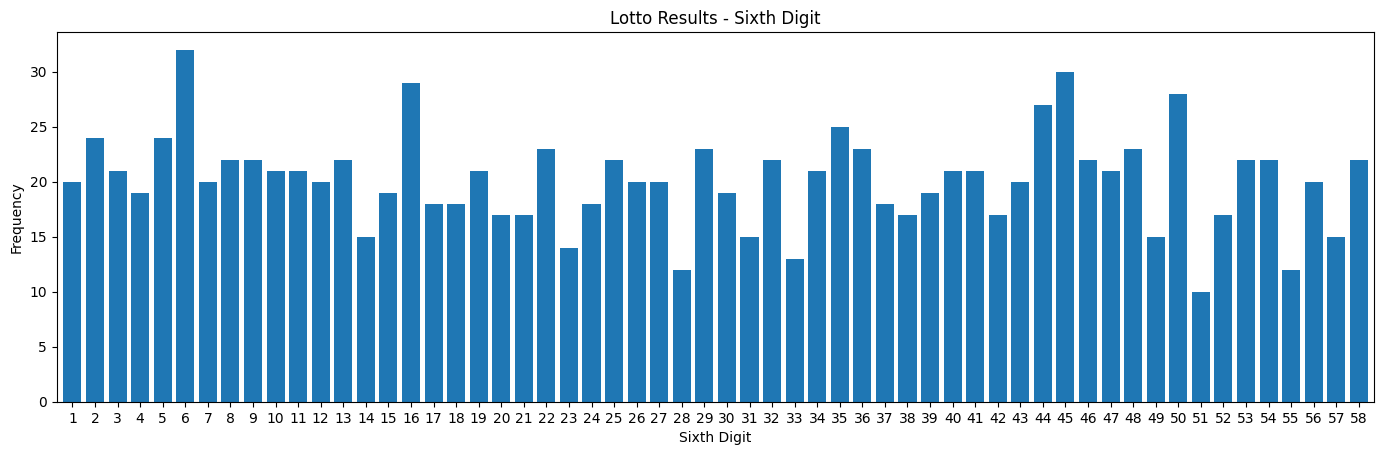

In [13]:
digitTarget = []
clearyValues()
getDigit(6)
getyValues()
pltFigure("Lotto Results - Sixth Digit","Sixth Digit")

---
## Central Tendency
<a id="cten"></a>

---

>Assuming that each lottery draw is an independent event or every number has an equal chance of being drawn with no relation to previous draws, This means that there is no inherent "average" combination which can be identified. Therefore, the concept of central tendency, which is based on patterns and averages, may not apply as directly to lotto combinations. 

---
# Exploratory Analysis
<a id="exanal"></a>

---

1. **Heatmap**
>To summarize the results of the digit analysis earlier and visualize it easier, it is advisable to construct a heatmap where the intensity is the frequencies of the lotto number on a given digit.
<a id="hmap"></a>

---

In [14]:
# 1st digit
digitTarget = []
clearyValues()
getDigit(1)
getyValues()
dfHeatmap = pd.DataFrame()

def mainArr(dig):
    lottoArray = {"DIGIT": dig,
                "LOTTO NUMBER": np.arange(1,59),
                "FREQUENCY": yValues.values()}
    dfHeatmap = pd.DataFrame(lottoArray)
    return dfHeatmap

dfHeatmap = pd.DataFrame(mainArr(1))

In [15]:
digitTarget = []
clearyValues()
getDigit(2)
getyValues()

dfHeatmap = pd.concat([dfHeatmap,pd.DataFrame(mainArr(2))])

In [16]:
digitTarget = []
clearyValues()
getDigit(3)
getyValues()

dfHeatmap = pd.concat([dfHeatmap,pd.DataFrame(mainArr(3))])

In [17]:
digitTarget = []
clearyValues()
getDigit(4)
getyValues()

dfHeatmap = pd.concat([dfHeatmap,pd.DataFrame(mainArr(4))])

In [18]:
digitTarget = []
clearyValues()
getDigit(5)
getyValues()

dfHeatmap = pd.concat([dfHeatmap,pd.DataFrame(mainArr(5))])

In [19]:
digitTarget = []
clearyValues()
getDigit(6)
getyValues()

dfHeatmap = pd.concat([dfHeatmap,pd.DataFrame(mainArr(6))])

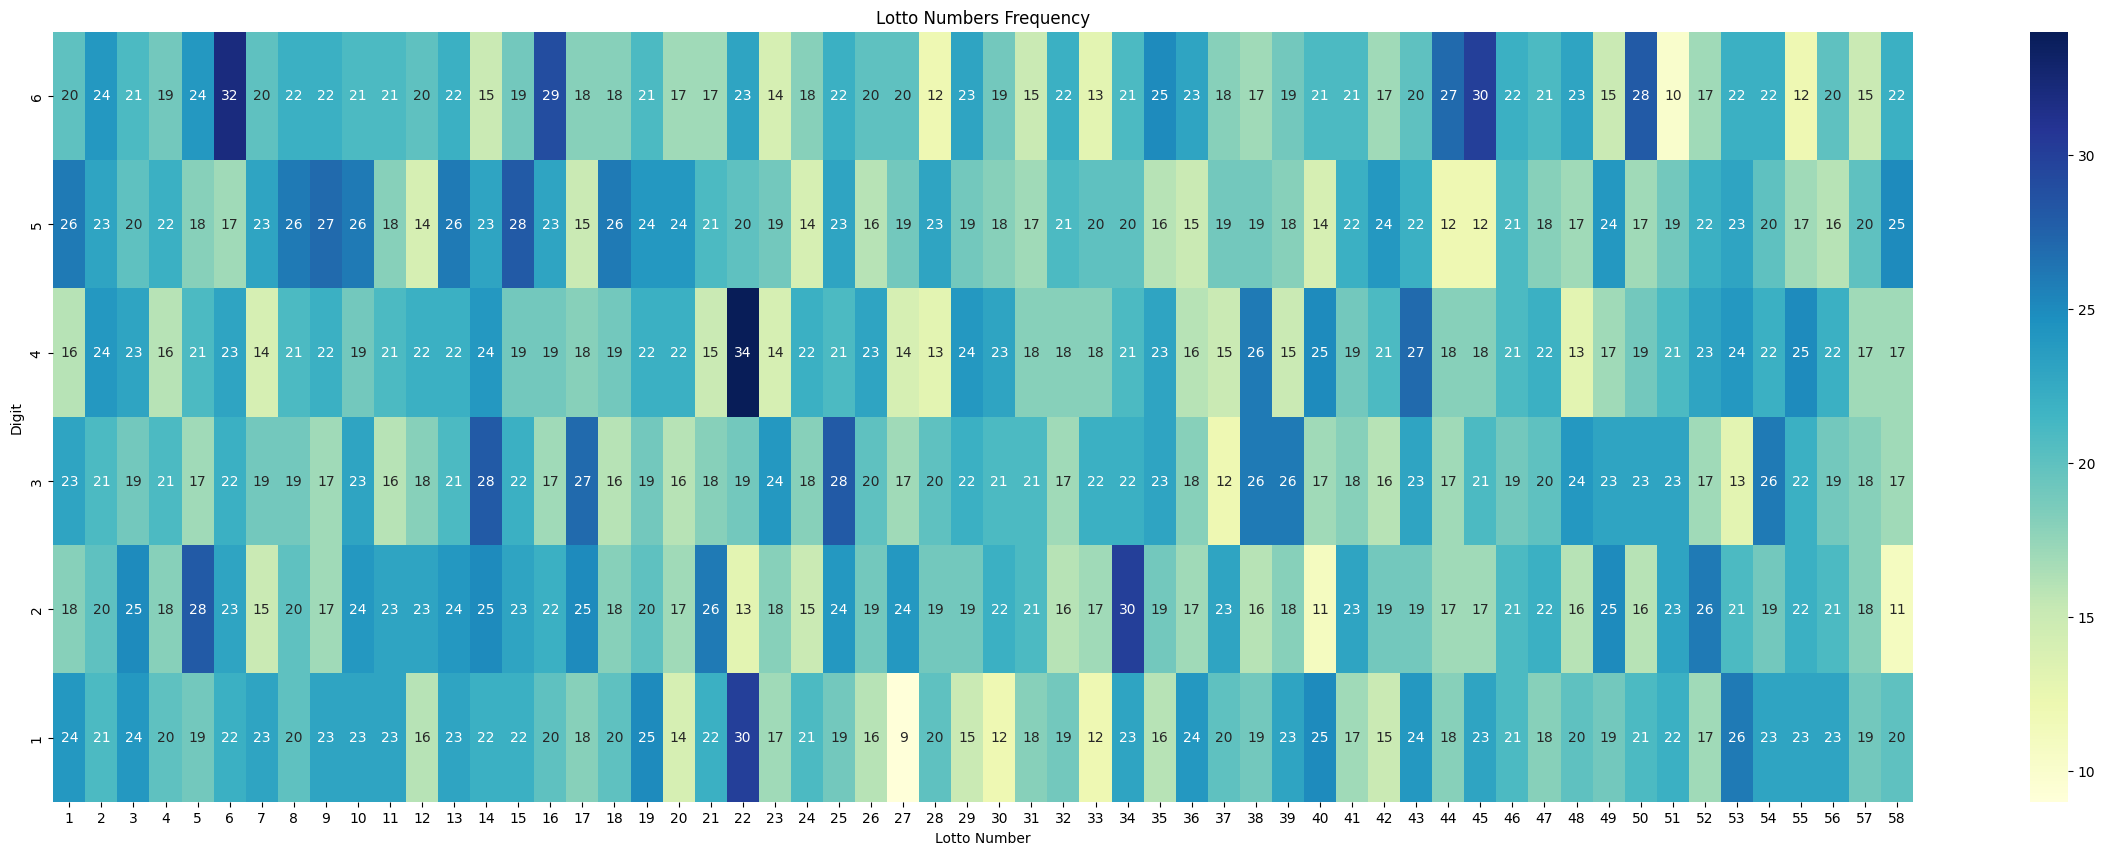

In [21]:
dataHeatmap = dfHeatmap.pivot(columns="LOTTO NUMBER",index="DIGIT",values="FREQUENCY")

plt.figure(figsize=(30,10))
sns.heatmap(dataHeatmap,cmap="YlGnBu",annot=True).invert_yaxis()

plt.xlabel("Lotto Number")
plt.ylabel("Digit")
plt.title("Lotto Numbers Frequency")
plt.show()